In [24]:
import pandas as pd
data=pd.read_excel('Landing.Jobs - Tech Career Survey PT 2021 - Raw Data.xlsx', sheet_name=1, header=0)

## Question: What is the most typical profile of permanent contract workers planning to change job in the next 6 months?

### 1- EDA

In [25]:
#analyzing permanent employees only
index_names = data[data['Employment_Status_Aggregated']=='Contractor' ].index
data=data.drop(index_names, axis=0)

In [26]:
#drop columns that might not be relevant for answering this question
data=data.drop(data.columns[data.columns.str.contains('Language_')==True], axis=1) # program languges they uses
data=data.drop(data.columns[data.columns.str.contains('Framework_')==True], axis=1) # working platforms they use
data=data.drop(data.columns[data.columns.str.contains('Employment_Status')==True], axis=1) #
data=data.drop(data.columns[data.columns.str.contains('Residence_Country')==True], axis=1) # personal details
data=data.drop(data.columns[data.columns.str.contains('Contractor_')==True], axis=1) # for workers under contract
#data=data.drop(data.columns[data.columns.str.contains('Remote_Working_')==True], axis=1) # if working remote because of covid

In [27]:
#drop not relevant here
data=data.drop(['ID', 'Residence_District', 'Birth_Year', 'Work_as_Perm'], axis=1)

In [28]:
#drop non adjusted information
data=data.drop(['Unnamed: 126', 'Working_Experience', 'Work_Company_PT_District'], axis=1)

In [29]:
# drop nos adjusted job roles
data=data.drop(['Job_Role_Original','Job_Role_Other'], axis=1)

In [30]:
# drop columns with open questions
data=data.drop(['Way_Into_Tech_Other','Employer_Org_Type_Other', 'Employer_Industry_Other'], axis=1)

In [31]:
# just keep the adjusted average salary only
data=data.drop(['Perm_GAS','Perm_GAS_Low_Limit', 'Perm_GAS_High_Limit', 'Avg_Salary'], axis=1) 

In [32]:
#drop district and country infomation (too many factors)
data=data.drop(['Residence_District_Aggregated','Work_Company_Country', 'Work_Company_PT_District_Aggregated'], axis=1)

In [33]:
#change citizen ship for portuguese or not
data.loc[(data['Citizenship'] != 'Portuguese'), 'Citizenship'] = 0
data.loc[(data['Citizenship'] == 'Portuguese'), 'Citizenship'] = 1

In [34]:
data.loc[(data['Gender'] == 'Male'), 'Gender'] = 0
data.loc[(data['Gender'] == 'Female'), 'Gender'] = 1

In [35]:
data.loc[(data['Job_Remote_or_Office'] == 'Full Office Job'), 'Job_Remote_or_Office'] = 0
data.loc[(data['Job_Remote_or_Office'] == 'Remote Job (full or flexible)'), 'Job_Remote_or_Office'] = 1

In [ ]:
data.loc[(data['Job_Remote_or_Office'] == 'Full Office Job'), 'Job_Remote_or_Office'] = 0
data.loc[(data['Job_Remote_or_Office'] == 'Remote Job (full or flexible)'), 'Job_Remote_or_Office'] = 1
data.loc[(data['Job_Remote_or_Office'] == 'Remote Job (full or flexible)'), 'Job_Remote_or_Office'] = 1

In [36]:
data.loc[(data['Employer_Size'] == 'Less than 10 employees'), 'Employer_Size'] = 0
data.loc[(data['Employer_Size'] == '10 - 19 employees'), 'Employer_Size'] = 1
data.loc[(data['Employer_Size'] == '20 - 99 employees'), 'Employer_Size'] = 2
data.loc[(data['Employer_Size'] == '100 - 499 employees'), 'Employer_Size'] = 3
data.loc[(data['Employer_Size'] == '500 - 999 employees'), 'Employer_Size'] = 4
data.loc[(data['Employer_Size'] == '1000 - 4.999 employees'), 'Employer_Size'] = 5
data.loc[(data['Employer_Size'] == 'More than 5.000 employees'), 'Employer_Size'] = 6

In [37]:
data.loc[(data['Perm_Current_Company_how_long'] == 'Less than one year'), 'Perm_Current_Company_how_long'] = 0
data.loc[(data['Perm_Current_Company_how_long'] == 'Between 1 - 3 years'), 'Perm_Current_Company_how_long'] = 1
data.loc[(data['Perm_Current_Company_how_long'] == 'More than 3 years'), 'Perm_Current_Company_how_long'] = 2

In [38]:
data.loc[(data['Salary_Change'] == 'Decreased more than 15%'), 'Salary_Change'] = -3
data.loc[(data['Salary_Change'] == '[-15%, -5%['), 'Salary_Change'] = -2
data.loc[(data['Salary_Change'] == '[-5%, 0%['), 'Salary_Change'] = -1
data.loc[(data['Salary_Change'] == "Hasn't changed"), 'Salary_Change'] = 0
data.loc[(data['Salary_Change'] == ']0%, 5%]'), 'Salary_Change'] = 1
data.loc[(data['Salary_Change'] == ']5%,15%]'), 'Salary_Change'] = 2
data.loc[(data['Salary_Change'] == 'Increased more than 15%'), 'Salary_Change'] = 3

In [39]:
data.loc[(data['Work_Company_Continent'] == 'Africa'), 'Work_Company_Continent'] = 1
data.loc[(data['Work_Company_Continent'] == 'Asia'), 'Work_Company_Continent'] = 1
data.loc[(data['Work_Company_Continent'] == 'Europe'), 'Work_Company_Continent'] = 0
data.loc[(data['Work_Company_Continent'] == "Middle East"), 'Work_Company_Continent'] = 1
data.loc[(data['Work_Company_Continent'] == 'North America'), 'Work_Company_Continent'] = 1
data.loc[(data['Work_Company_Continent'] == 'Oceania'), 'Work_Company_Continent'] = 1
data.loc[(data['Work_Company_Continent'] == 'South America'), 'Work_Company_Continent'] = 1

In [40]:
data.loc[(data['Work_Company_PT_International'] == 'Portugal'), 'Work_Company_PT_International'] = 0
data.loc[(data['Work_Company_PT_International'] == 'International'), 'Work_Company_PT_International'] = 1

In [41]:
data.loc[(data['English_Level'] == 'Elementary'), 'English_Level'] = 0
data.loc[(data['English_Level'] == 'Limited working proficiency'), 'English_Level'] = 1
data.loc[(data['English_Level'] == 'Professional working proficiency'), 'English_Level'] = 2
data.loc[(data['English_Level'] == 'Full professional proficiency'), 'English_Level'] = 3
data.loc[(data['English_Level'] == 'Native or bilingual proficiency'), 'English_Level'] = 4

In [42]:
data.loc[(data['Way_Into_Tech'] == 'Self-taught'), 'Way_Into_Tech'] = 0
data.loc[(data['Way_Into_Tech'] == 'Code bootcamp'), 'Way_Into_Tech'] = 1
data.loc[(data['Way_Into_Tech'] == 'University'), 'Way_Into_Tech'] = 2

In [43]:
data.loc[(data['Education_Level'] == 'I prefer not to answer'), 'Education_Level'] = -1
data.loc[(data['Education_Level'] == 'Basic Education'), 'Education_Level'] = 0
data.loc[(data['Education_Level'] == 'High School Education'), 'Education_Level'] = 1
data.loc[(data['Education_Level'] == 'Trade/technical/vocational training'), 'Education_Level'] = 2
data.loc[(data['Education_Level'] == 'University drop out'), 'Education_Level'] = 3
data.loc[(data['Education_Level'] == 'Bachelor degree'), 'Education_Level'] = 4
data.loc[(data['Education_Level'] == 'Masters degree'), 'Education_Level'] = 5
data.loc[(data['Education_Level'] == 'Doctoral degree'), 'Education_Level'] = 6

In [44]:
#drop 'I prefer not to answer' in 'Education_Level'
index_dropEducation = data[data['Education_Level']==-1 ].index
data=data.drop(index_dropEducation, axis=0)

In [45]:
data.loc[(data['Working_Experience_Aggregated'] == '0 Years'), 'Working_Experience_Aggregated'] = 0
data.loc[(data['Working_Experience_Aggregated'] == '0 - 3 years'), 'Working_Experience_Aggregated'] = 1
data.loc[(data['Working_Experience_Aggregated'] == '3 - 6 years'), 'Working_Experience_Aggregated'] = 2
data.loc[(data['Working_Experience_Aggregated'] == '6+ years'), 'Working_Experience_Aggregated'] = 3

In [46]:
data.head()

,Work_Company_Continent,Work_Company_PT_International,Job_Remote_or_Office,Remote_Work_Opinion,Job_Role,Employer_Industry,Employer_Org_Type,Employer_Size,Perm_Current_Company_how_long,Perm_GAS_Avg,...,Job_Perk_Stock_options_or_shares,Job_Perk_Education_sponsorship,Job_Perk_Child_care,Citizenship,Age,Gender,English_Level,Way_Into_Tech,Education_Level,Working_Experience_Aggregated
0,0,0,0,6.0,Technical Team Leader,Financial and banking,Corporate,5,2,32500.0,...,2,7,7,1,37.0,0,3,2,NaN,3
1,0,0,0,7.0,Full-Stack Developer,Software development - other,SME - Small or Medium Enterprise (personnel <250),0,1,12500.0,...,3,6,5,1,45.0,0,3,0,NaN,3
3,0,0,0,5.0,Product Owner/Product Manager,Web development or design,SME - Small or Medium Enterprise (personnel <250),3,1,17500.0,...,2,5,6,1,46.0,0,3,2,4,3
4,0,0,1,5.0,Back-End Developer,Software development - other,SME - Small or Medium Enterprise (personnel <250),1,2,17500.0,...,6,4,4,1,32.0,0,2,2,4,3
5,0,0,0,7.0,Mobile Apps Developer,Consulting,Consulting Business,5,1,17500.0,...,7,7,5,1,26.0,0,4,NaN,1,1


In [47]:
#drop other object columns with too many factors
data=data.drop(['Job_Role','Employer_Industry', 'Employer_Org_Type'], axis=1)

In [48]:
data=data.dropna() # drop rows with empty answers

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3042 entries, 3 to 3369
Data columns (total 42 columns):
Work_Company_Continent                                                         3042 non-null object
Work_Company_PT_International                                                  3042 non-null int64
Job_Remote_or_Office                                                           3042 non-null int64
Remote_Work_Opinion                                                            3042 non-null float64
Employer_Size                                                                  3042 non-null int64
Perm_Current_Company_how_long                                                  3042 non-null int64
Perm_GAS_Avg                                                                   3042 non-null float64
Salary_Change                                                                  3042 non-null object
Salary_Fairness                                                                3042 non-null in

In [50]:
data.to_csv('JustPermContracts') # p fazer famd

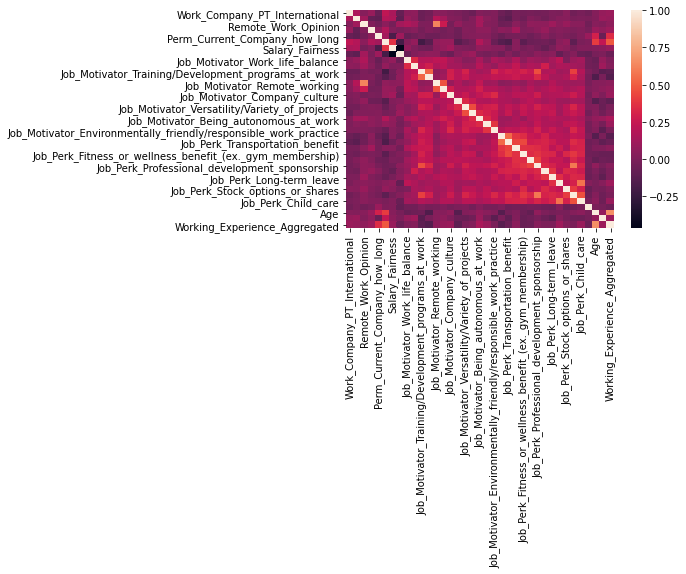

In [52]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(data.corr())
plt.show()

# 2- FAMD analysis
### Switching to R kernel - good FAMD libraries

In [1]:
#read saved file
Data <- read.csv(file = 'JustPermContracts', row.names = 1)
head(Data) 

,Work_Company_Continent,Work_Company_PT_International,Job_Remote_or_Office,Remote_Work_Opinion,Employer_Size,Perm_Current_Company_how_long,Perm_GAS_Avg,Salary_Change,Salary_Fairness,Changing_Jobs_next_6_months,...,Job_Perk_Stock_options_or_shares,Job_Perk_Education_sponsorship,Job_Perk_Child_care,Citizenship,Age,Gender,English_Level,Way_Into_Tech,Education_Level,Working_Experience_Aggregated
,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,...,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<int>,<int>
3,0,0,0,5,3,1,17500,1,4,3,...,2,5,6,1,46,0,3,2,4,3
4,0,0,1,5,1,2,17500,3,5,2,...,6,4,4,1,32,0,2,2,4,3
6,0,0,0,7,6,1,27500,2,3,5,...,4,4,1,1,30,1,3,2,4,2
7,0,0,0,6,4,2,22500,0,1,4,...,4,6,6,1,38,0,4,2,4,3
8,0,0,0,7,5,1,12500,0,1,3,...,4,4,4,1,24,0,1,2,4,1
9,0,1,1,7,5,2,27500,0,3,5,...,4,5,6,1,39,1,3,2,4,3


In [2]:
library("FactoMineR")
library('reader')
library("factoextra")
library('missMDA')

Loading required package: NCmisc


Attaching package: 'reader'


The following objects are masked from 'package:NCmisc':

    cat.path, get.ext, rmv.ext


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [17]:
#which(colnames(Data) %in% c('Changing_Jobs_next_6_months')) #10
Data[,10] <- as.factor(Data[,10])

In [18]:
res_famd = FAMD(Data, ncp = 10, sup.var = NULL, ind.sup = NULL, graph = TRUE)

Warning message:
"ggrepel: 3016 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 3016 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 36 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


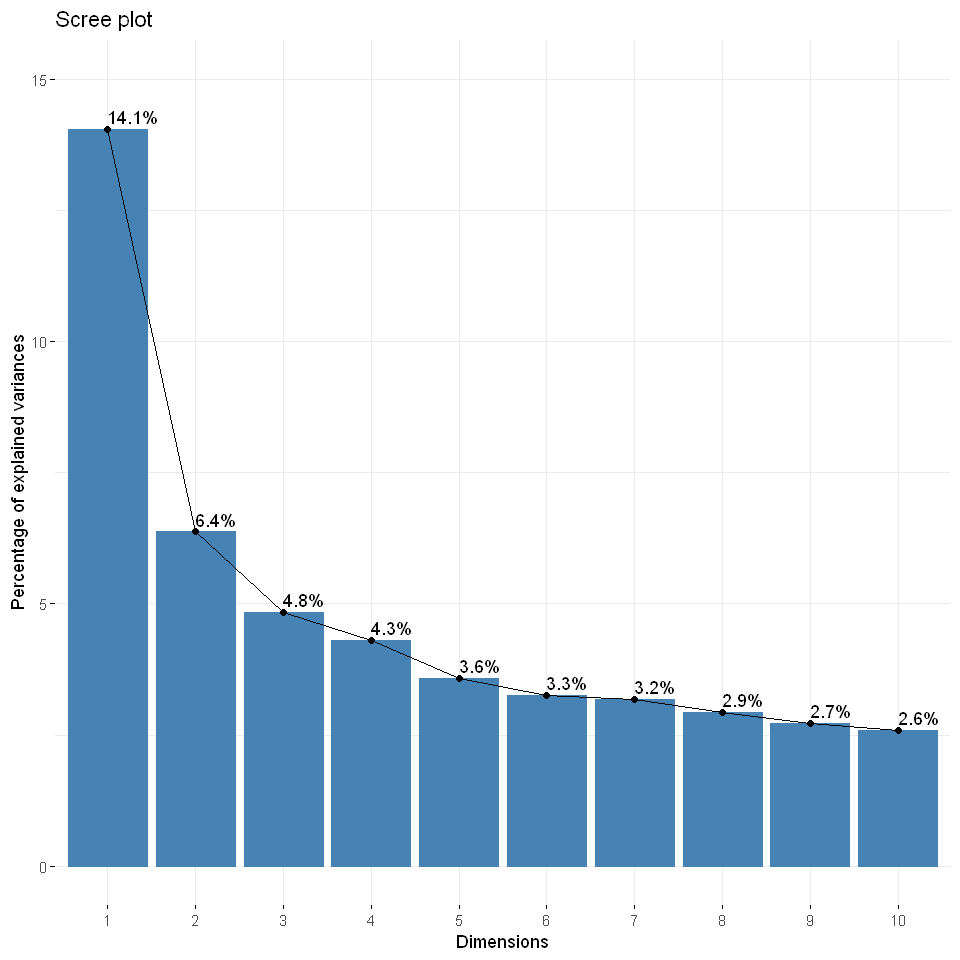

In [40]:
library(repr)
options(repr.plot.width=8, repr.plot.height=8)
fviz_screeplot(res_famd, addlabels = TRUE, ylim = c(0, 15))

In [41]:
res_famd$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,6.463634,14.051379,14.05138
comp 2,2.932220,6.374392,20.42577
comp 3,2.225224,4.837443,25.26321
comp 4,1.979962,4.304265,29.56748
comp 5,1.647817,3.582210,33.14969
comp 6,1.498655,3.257947,36.40764
comp 7,1.465687,3.186276,39.59391
comp 8,1.348137,2.930733,42.52464
comp 9,1.252506,2.722840,45.24748
comp 10,1.190332,2.587679,47.83516


#### The current analysis explains up to ca. 50% of the variance of the dataset

Warning message:
"ggrepel: 3034 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 3036 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


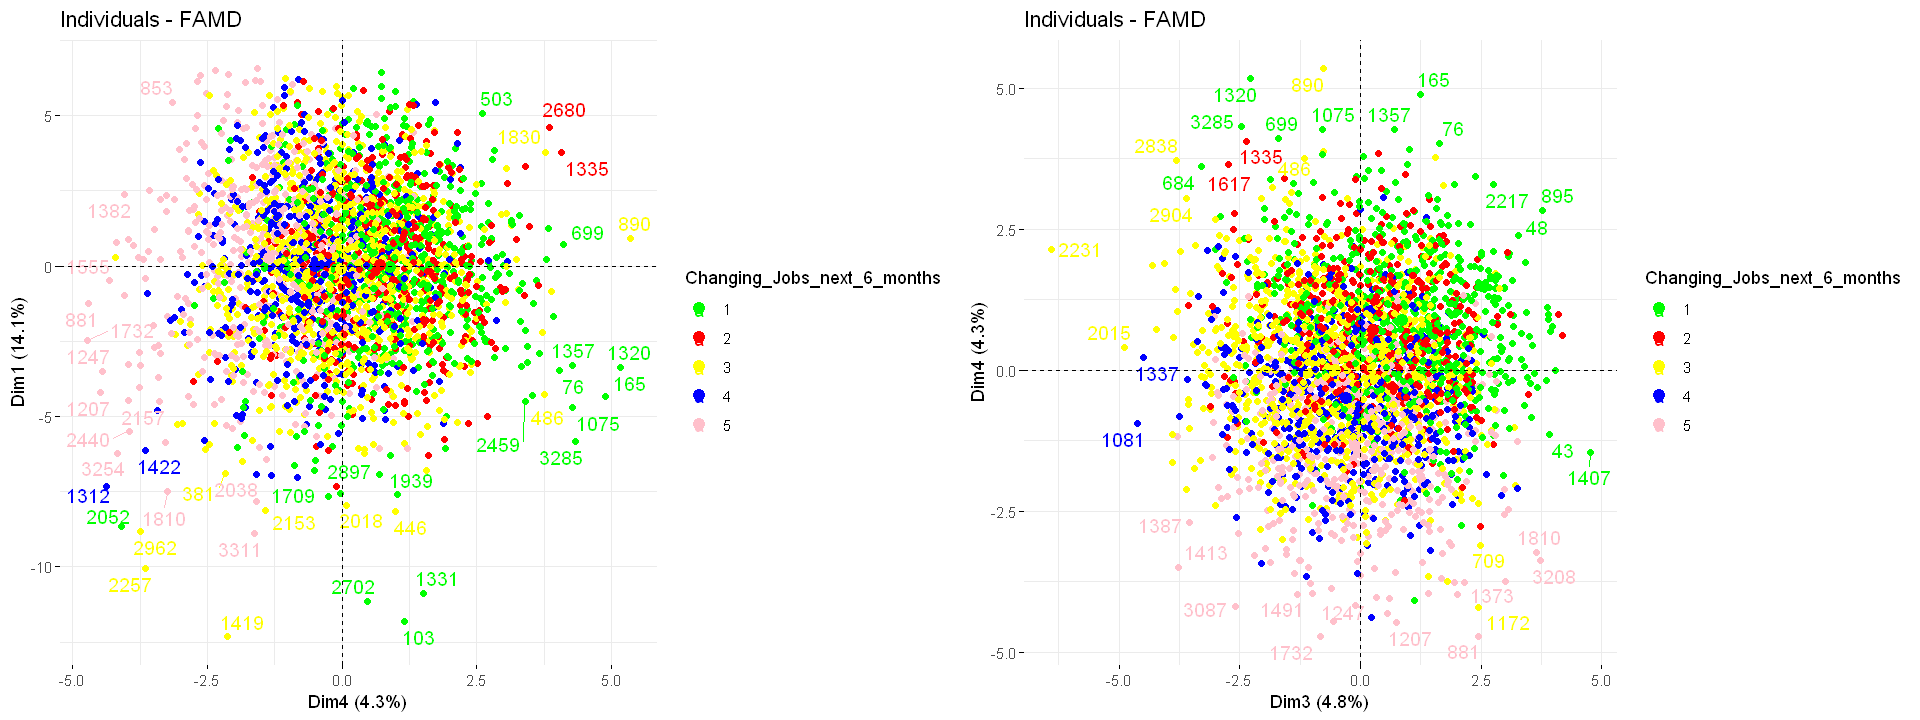

In [47]:
library(gridExtra)

#library(repr)
options(repr.plot.width=16, repr.plot.height=6)

library(RColorBrewer)
# Define the number of colors you want
nb.cols <- 5
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_famd, axes=c(4,1),
             habillage = "Changing_Jobs_next_6_months", # color by groups 
             palette = mycolors,
             addEllipses = FALSE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

b=fviz_mfa_ind(res_famd, axes=c(3,4),
             habillage = "Changing_Jobs_next_6_months", # color by groups 
             palette = mycolors,
             addEllipses = FALSE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

gridExtra::grid.arrange(a,b, ncol=2)

#### Results show that dimension 4 clearly separates the ones with highest self reported intention of changing jobs (pink and blues colors) from the one that do not plan change jobs (green and red). Of particular observation is that none of the respondents answered 6 or 7 levels (definitely changing job).

Warning message:
"ggrepel: 3036 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 38 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


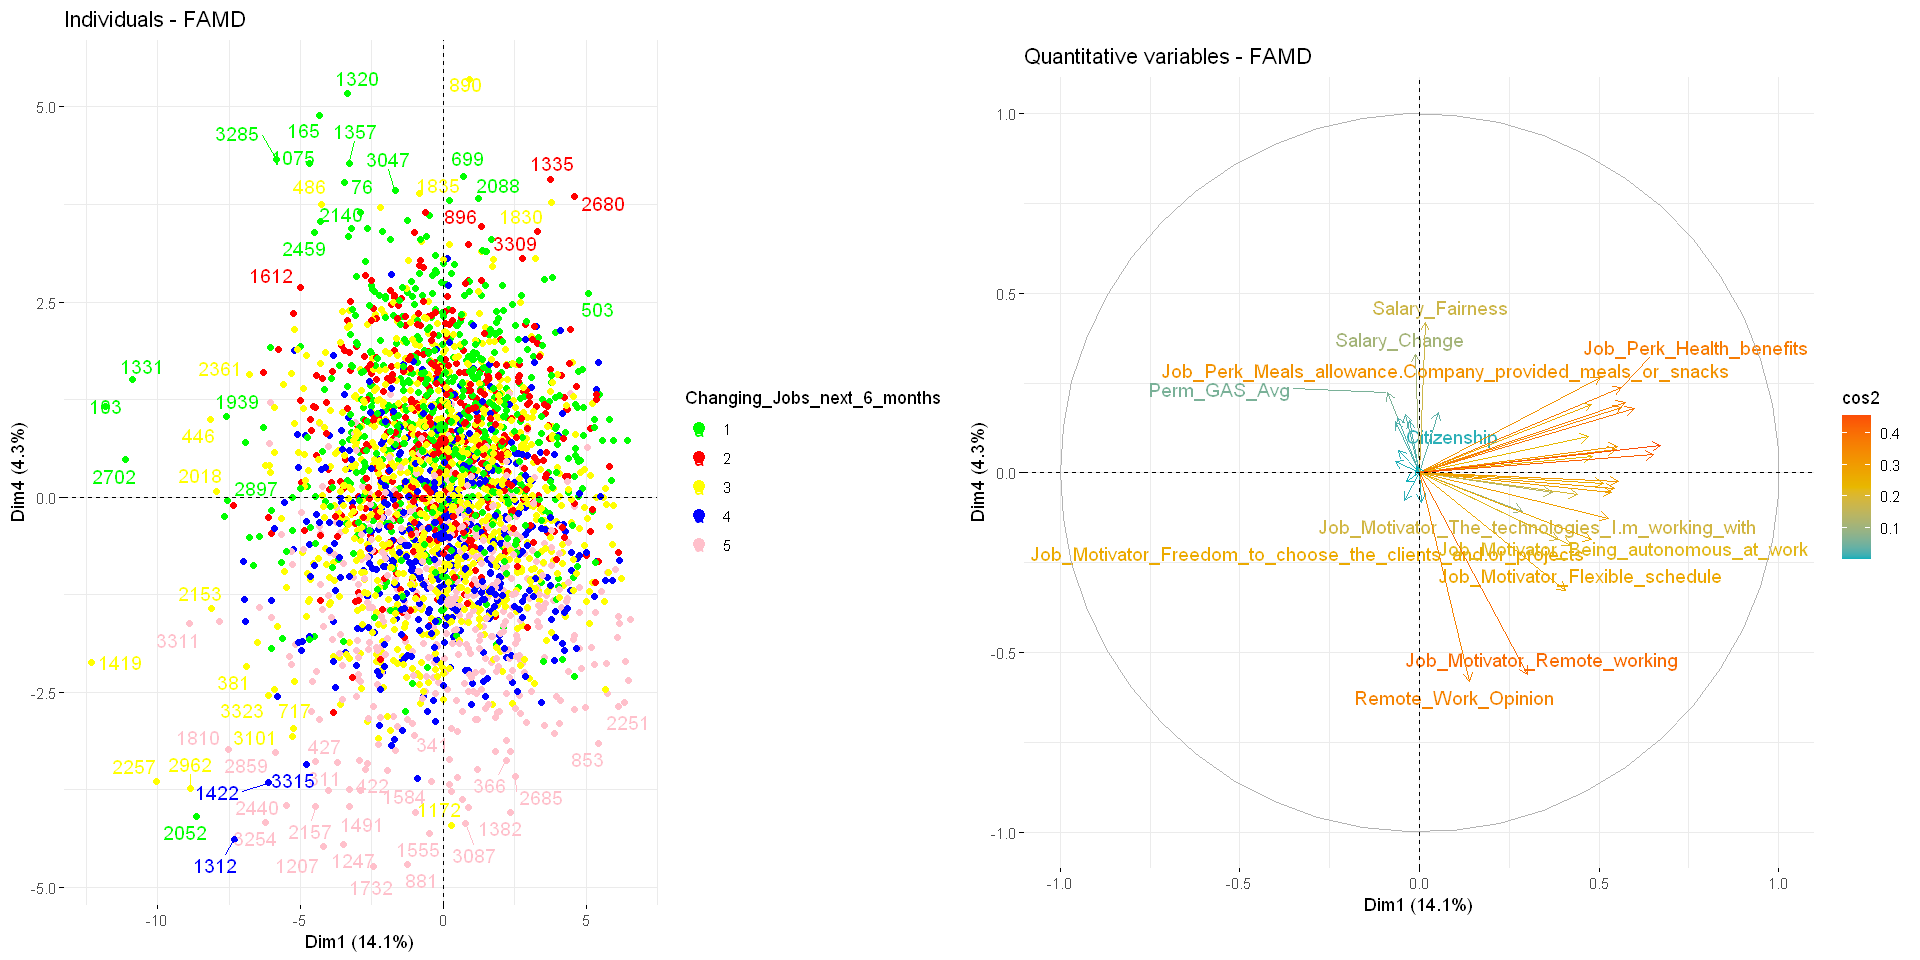

In [30]:

options(repr.plot.width=16, repr.plot.height=8)

a=fviz_mfa_ind(res_famd, axes=c(1,4),
             habillage = "Changing_Jobs_next_6_months", # color by groups 
             palette = mycolors,
             addEllipses = FALSE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )
             
b=fviz_famd_var(res_famd, "quanti.var", col.var = "cos2", axes = c(1,4),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE) + xlim(-1,1) + ylim(-1,1)

gridExtra::grid.arrange(a,b, ncol=2)

Warning message:
"ggrepel: 32 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


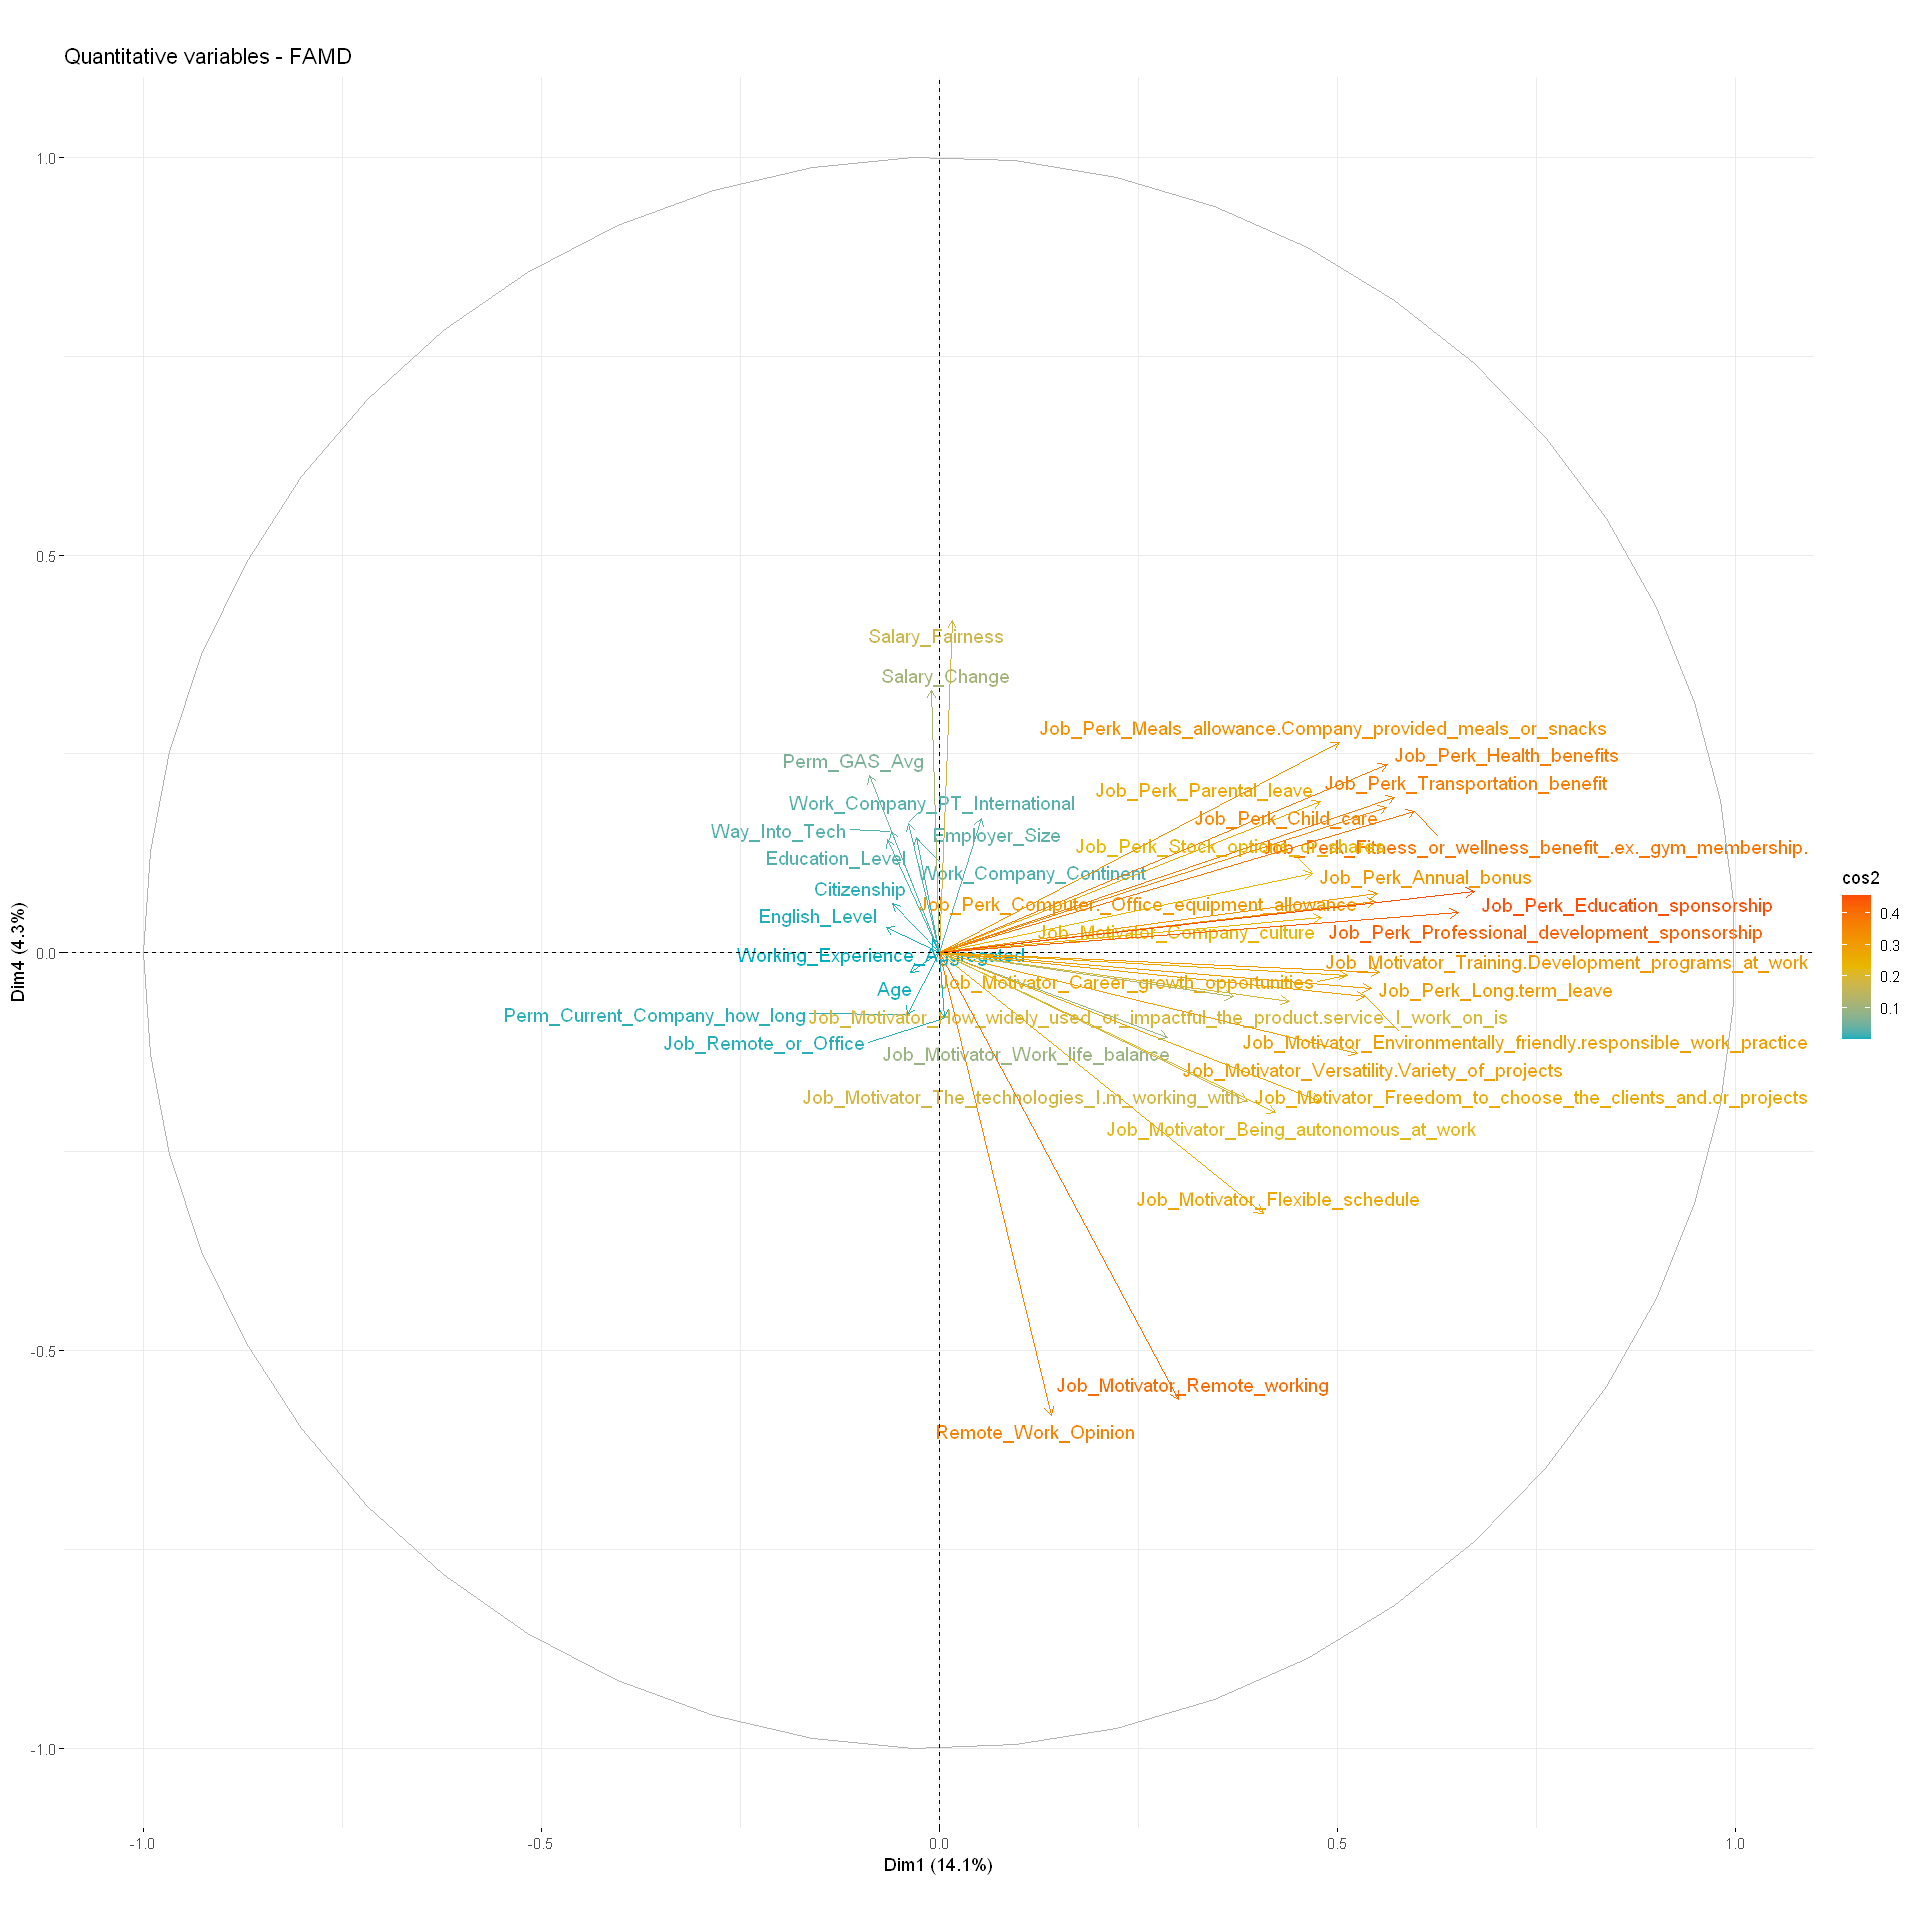

In [34]:
#amplified view for better visualization
options(repr.plot.width=16, repr.plot.height=16)
             
fviz_famd_var(res_famd, "quanti.var", col.var = "cos2", axes = c(1,4),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE) + xlim(-1,1) + ylim(-1,1)


#### Analysis of the 1st and 4th dimensions allows to infer the main variables relevant for considering changing jobs. Workers reporting intention to change jobs apparently chose the current job due to remote working being allowed, self reported higher levels of inclination for remote working and other job motivators were flexible schedule, autonomy at work, freedon to choose clients. On the other hand workers that did not report intention to change jobs have good health benefits, good child care benefits, good transport benefits, consider salary fair but mostly education and professional developments sponsorhips.

Warning message:
"ggrepel: 3038 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 38 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


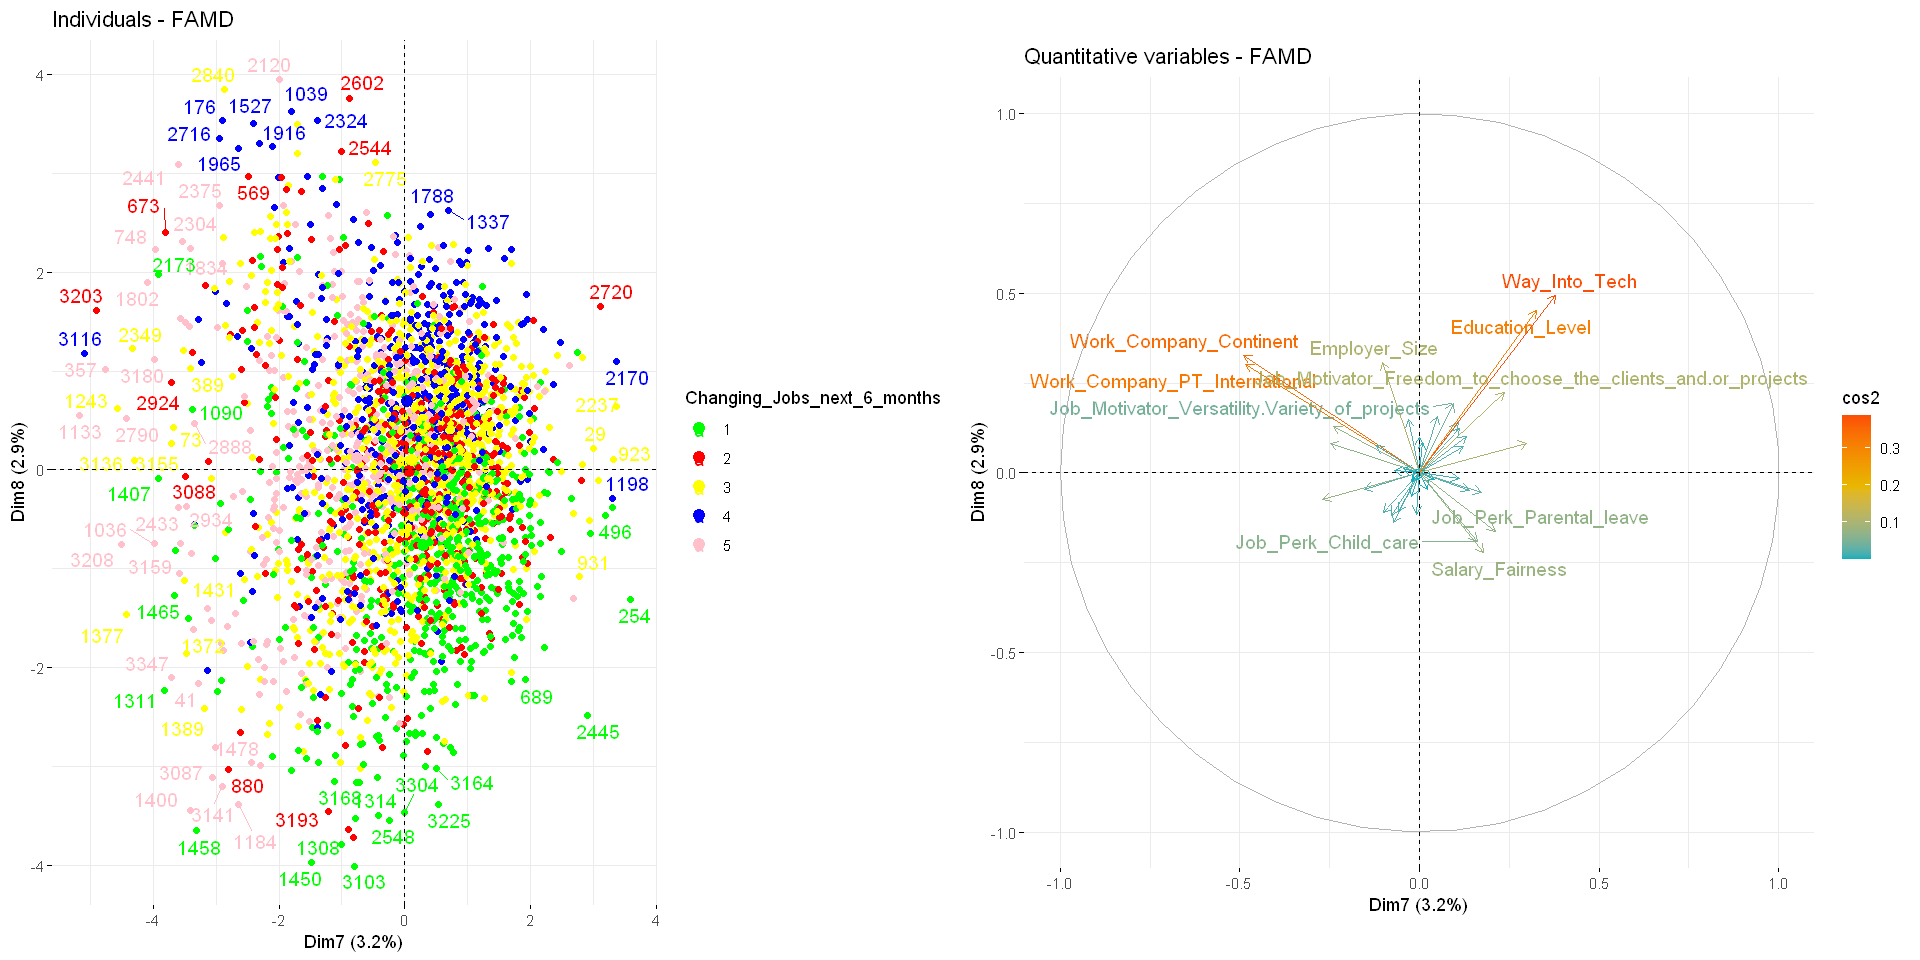

In [37]:
#library(repr)
#options(repr.plot.width=16, repr.plot.height=8)

#library(gridExtra)

a=fviz_mfa_ind(res_famd, axes=c(7,8),
             habillage = "Changing_Jobs_next_6_months", # color by groups 
             palette = mycolors,
             addEllipses = FALSE, ellipse.type = "confidence", 
             repel = TRUE) # Avoid text overlapping


b=fviz_famd_var(res_famd, "quanti.var", col.var = "cos2", axes = c(7,8),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE) + xlim(-1,1) + ylim(-1,1)

gridExtra::grid.arrange(a,b, ncol=2)

#### This analysis also indicates that the workers more prone to change jobs have higher levels of education and work for international companies outside Europe.

# In concusion, the permanent contract workers in Portugal most probably changing jobs are workers with a university degree that currently already work remotely for international companies and that have a higher amount of opportunities to switch from jobs that do not fit their own expectations.